In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
#importing the datasets
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
samplesubmission = pd.read_csv("sample_submission.csv")

train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NaN,NaN,NO,62,All-net 500F=2000F;5d,35.0,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NaN,2.0,NO,40,"Data: 100 F=40MB,24H",22.0,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,NaN,NaN,NO,32,All-net 500F=2000F;5d,3.0,0
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,NaN,NaN,NO,18,On net 200F=Unlimited _call24H,3.0,0
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,NaN,NaN,498.0,166.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN,NO,50,NaN,NaN,0


In [4]:
(train.isna().sum()/len(train)) * 100

user_id            0.00000
REGION            39.38000
TENURE             0.00000
MONTANT           35.06925
FREQUENCE_RECH    35.06925
REVENUE           33.66575
ARPU_SEGMENT      33.66575
FREQUENCE         33.66575
DATA_VOLUME       49.21350
ON_NET            36.45475
ORANGE            41.57925
TIGO              59.84650
ZONE1             92.07750
ZONE2             93.62175
MRG                0.00000
REGULARITY         0.00000
TOP_PACK          41.83225
FREQ_TOP_PACK     41.83225
CHURN              0.00000
dtype: float64

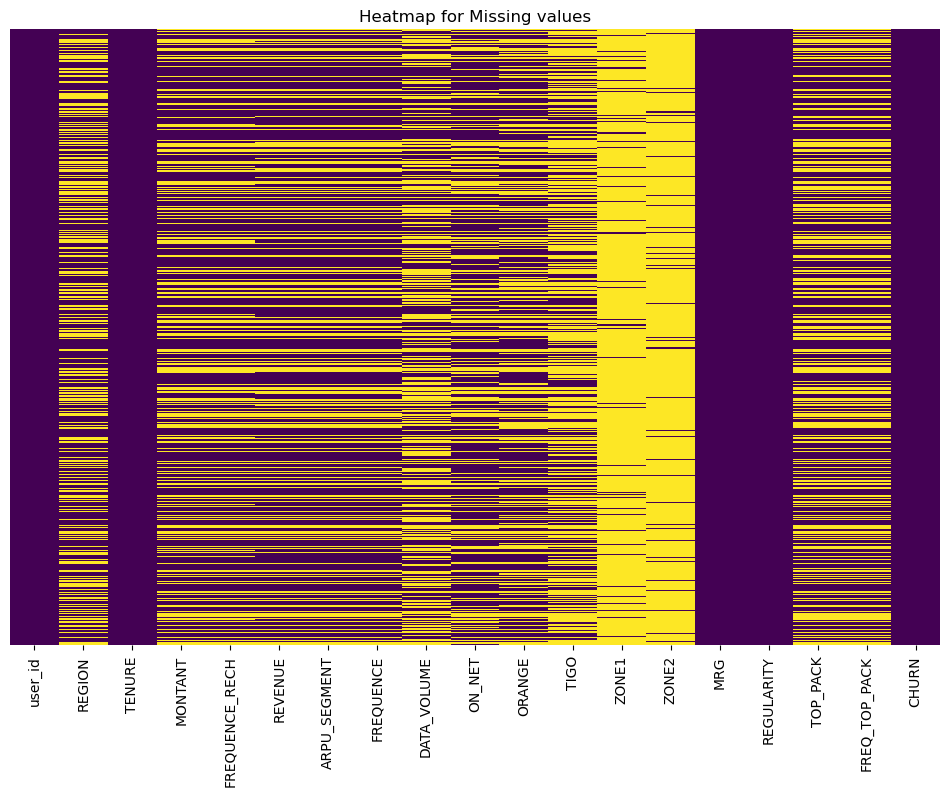

In [5]:
plt.figure(figsize=(12, 8))
sns.heatmap(train.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Heatmap for Missing values")
plt.show()

In [6]:
train = train.reset_index(drop=True)

train

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NaN,NaN,NO,62,All-net 500F=2000F;5d,35.0,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NaN,2.0,NO,40,"Data: 100 F=40MB,24H",22.0,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,NaN,NaN,NO,32,All-net 500F=2000F;5d,3.0,0
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,NaN,NaN,NO,18,On net 200F=Unlimited _call24H,3.0,0
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,NaN,NaN,498.0,166.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN,NO,50,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,a892ad4ed0eda8dc721733200c47147763b183ec,TAMBACOUNDA,K > 24 month,700.0,2.0,704.0,235.0,3.0,NaN,12.0,14.0,NaN,NaN,NaN,NO,46,All-net 500F=2000F;5d,1.0,0
399996,13daa3a651bf0192a413b339c4766aeafc6d1636,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,14,NaN,NaN,0
399997,767f596aee426962f7d92f4de8d7b232cdc17568,NaN,K > 24 month,700.0,2.0,699.0,233.0,5.0,237.0,1.0,NaN,NaN,NaN,NaN,NO,15,"Data: 100 F=40MB,24H",3.0,0
399998,b831e4d3b59a1e294e9e0a2aab391bc12d50845c,NaN,K > 24 month,NaN,NaN,9.0,3.0,1.0,0.0,NaN,0.0,NaN,NaN,NaN,NO,5,NaN,NaN,1


### Filling the missing columns of the title and location using the mode imputation

In [7]:
train.drop(["user_id", "DATA_VOLUME", "TIGO", "ZONE1", "ZONE2"], axis = 1, inplace = True)

In [8]:
#fill the missing values of the bathroom, bedroom &parking space using the mean
train.ORANGE = train.ORANGE.fillna(train.ORANGE.mean())
train.MONTANT = train.MONTANT.fillna(train.MONTANT.mean())
train.FREQUENCE_RECH = train.FREQUENCE_RECH.fillna(train.FREQUENCE_RECH.mean())
train.REVENUE = train.REVENUE.fillna(train.REVENUE.mean())
train.ON_NET = train.ON_NET.fillna(train.ON_NET.mean())
train.FREQ_TOP_PACK = train.FREQ_TOP_PACK.fillna(train.FREQ_TOP_PACK.mean())
train.FREQUENCE = train.FREQUENCE.fillna(train.FREQUENCE.mean())

In [9]:
mode = train["REGION"].mode()[0]
train["REGION"].fillna(mode, inplace=True)

In [10]:
mode = train["ARPU_SEGMENT"].mode()[0]
train["ARPU_SEGMENT"].fillna(mode, inplace=True)

In [11]:
mode = train["TOP_PACK"].mode()[0]
train["TOP_PACK"].fillna(mode, inplace=True)

In [12]:
(train.isna().sum()/len(train)) * 100

REGION            0.0
TENURE            0.0
MONTANT           0.0
FREQUENCE_RECH    0.0
REVENUE           0.0
ARPU_SEGMENT      0.0
FREQUENCE         0.0
ON_NET            0.0
ORANGE            0.0
MRG               0.0
REGULARITY        0.0
TOP_PACK          0.0
FREQ_TOP_PACK     0.0
CHURN             0.0
dtype: float64

In [13]:
train

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,ON_NET,ORANGE,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,SAINT-LOUIS,K > 24 month,17000.000000,32.000000,18000.000000,6000.0,34.000000,97.000000,355.000000,NO,62,All-net 500F=2000F;5d,35.000000,0
1,DAKAR,K > 24 month,4300.000000,29.000000,4427.000000,1476.0,37.000000,8.000000,3.000000,NO,40,"Data: 100 F=40MB,24H",22.000000,0
2,TAMBACOUNDA,K > 24 month,1500.000000,3.000000,1500.000000,500.0,3.000000,30.000000,30.000000,NO,32,All-net 500F=2000F;5d,3.000000,0
3,FATICK,K > 24 month,1500.000000,3.000000,2497.000000,832.0,4.000000,159.000000,45.000000,NO,18,On net 200F=Unlimited _call24H,3.000000,0
4,FATICK,K > 24 month,5522.971346,11.503733,498.000000,166.0,3.000000,1.000000,3.000000,NO,50,All-net 500F=2000F;5d,9.254209,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,TAMBACOUNDA,K > 24 month,700.000000,2.000000,704.000000,235.0,3.000000,12.000000,14.000000,NO,46,All-net 500F=2000F;5d,1.000000,0
399996,DAKAR,K > 24 month,5522.971346,11.503733,5505.487757,167.0,13.951835,275.917586,95.532927,NO,14,All-net 500F=2000F;5d,9.254209,0
399997,DAKAR,K > 24 month,700.000000,2.000000,699.000000,233.0,5.000000,1.000000,95.532927,NO,15,"Data: 100 F=40MB,24H",3.000000,0
399998,DAKAR,K > 24 month,5522.971346,11.503733,9.000000,3.0,1.000000,275.917586,0.000000,NO,5,All-net 500F=2000F;5d,9.254209,1


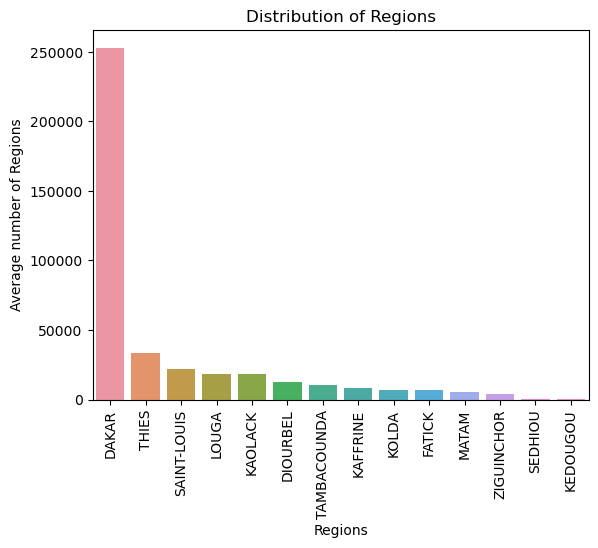

In [15]:
#plot to visualize the highest number of houses
sns.countplot(x = "REGION", data = train, order=train['REGION'].value_counts().index)

plt.xticks(rotation=90)

plt.xlabel('Regions')
plt.ylabel('Average number of Regions')

plt.title("Distribution of Regions") 

plt.show()

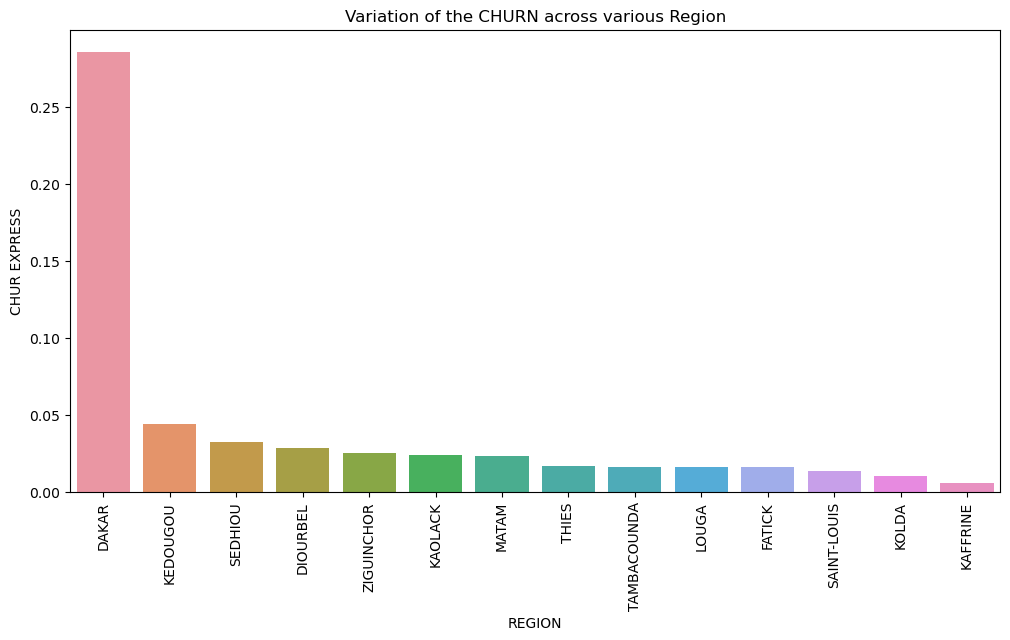

In [19]:
average_prices = train.groupby('REGION')['CHURN'].mean().reset_index()

average_prices_sorted = average_prices.sort_values(by='CHURN', ascending=False)

plt.figure(figsize=(12,6))

sns.barplot(data=average_prices_sorted, x='REGION', y='CHURN')

plt.title('Variation of the CHURN across various Region')
plt.ylabel('CHUR EXPRESS')
plt.xlabel('REGION')

plt.xticks(rotation=90)

plt.show()

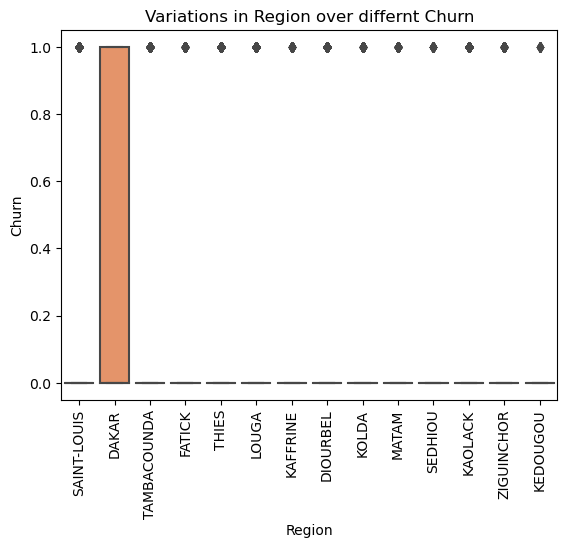

In [16]:
sns.boxplot(x='REGION', y='CHURN', data=train)

plt.title('Variations in Region over differnt Churn')

plt.xlabel('Region')
plt.ylabel('Churn')

plt.xticks(rotation=90)

plt.show()

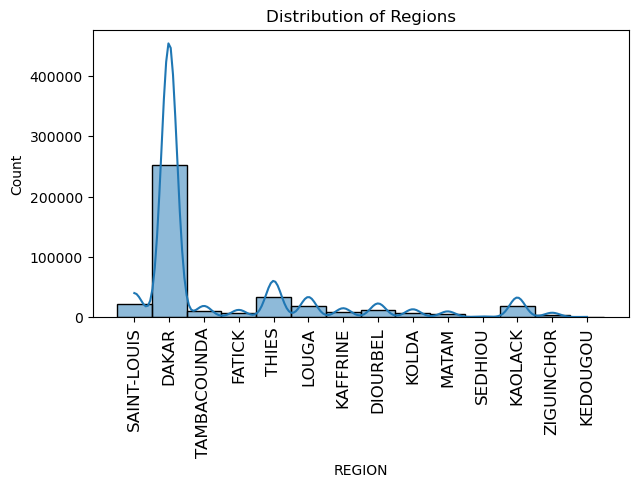

In [13]:
# Distribution plots for numeric features
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.histplot(train["REGION"], kde=True, bins=22)
plt.title('Distribution of Regions')
plt.xticks(rotation=90, fontsize=12)

plt.tight_layout()
plt.show()

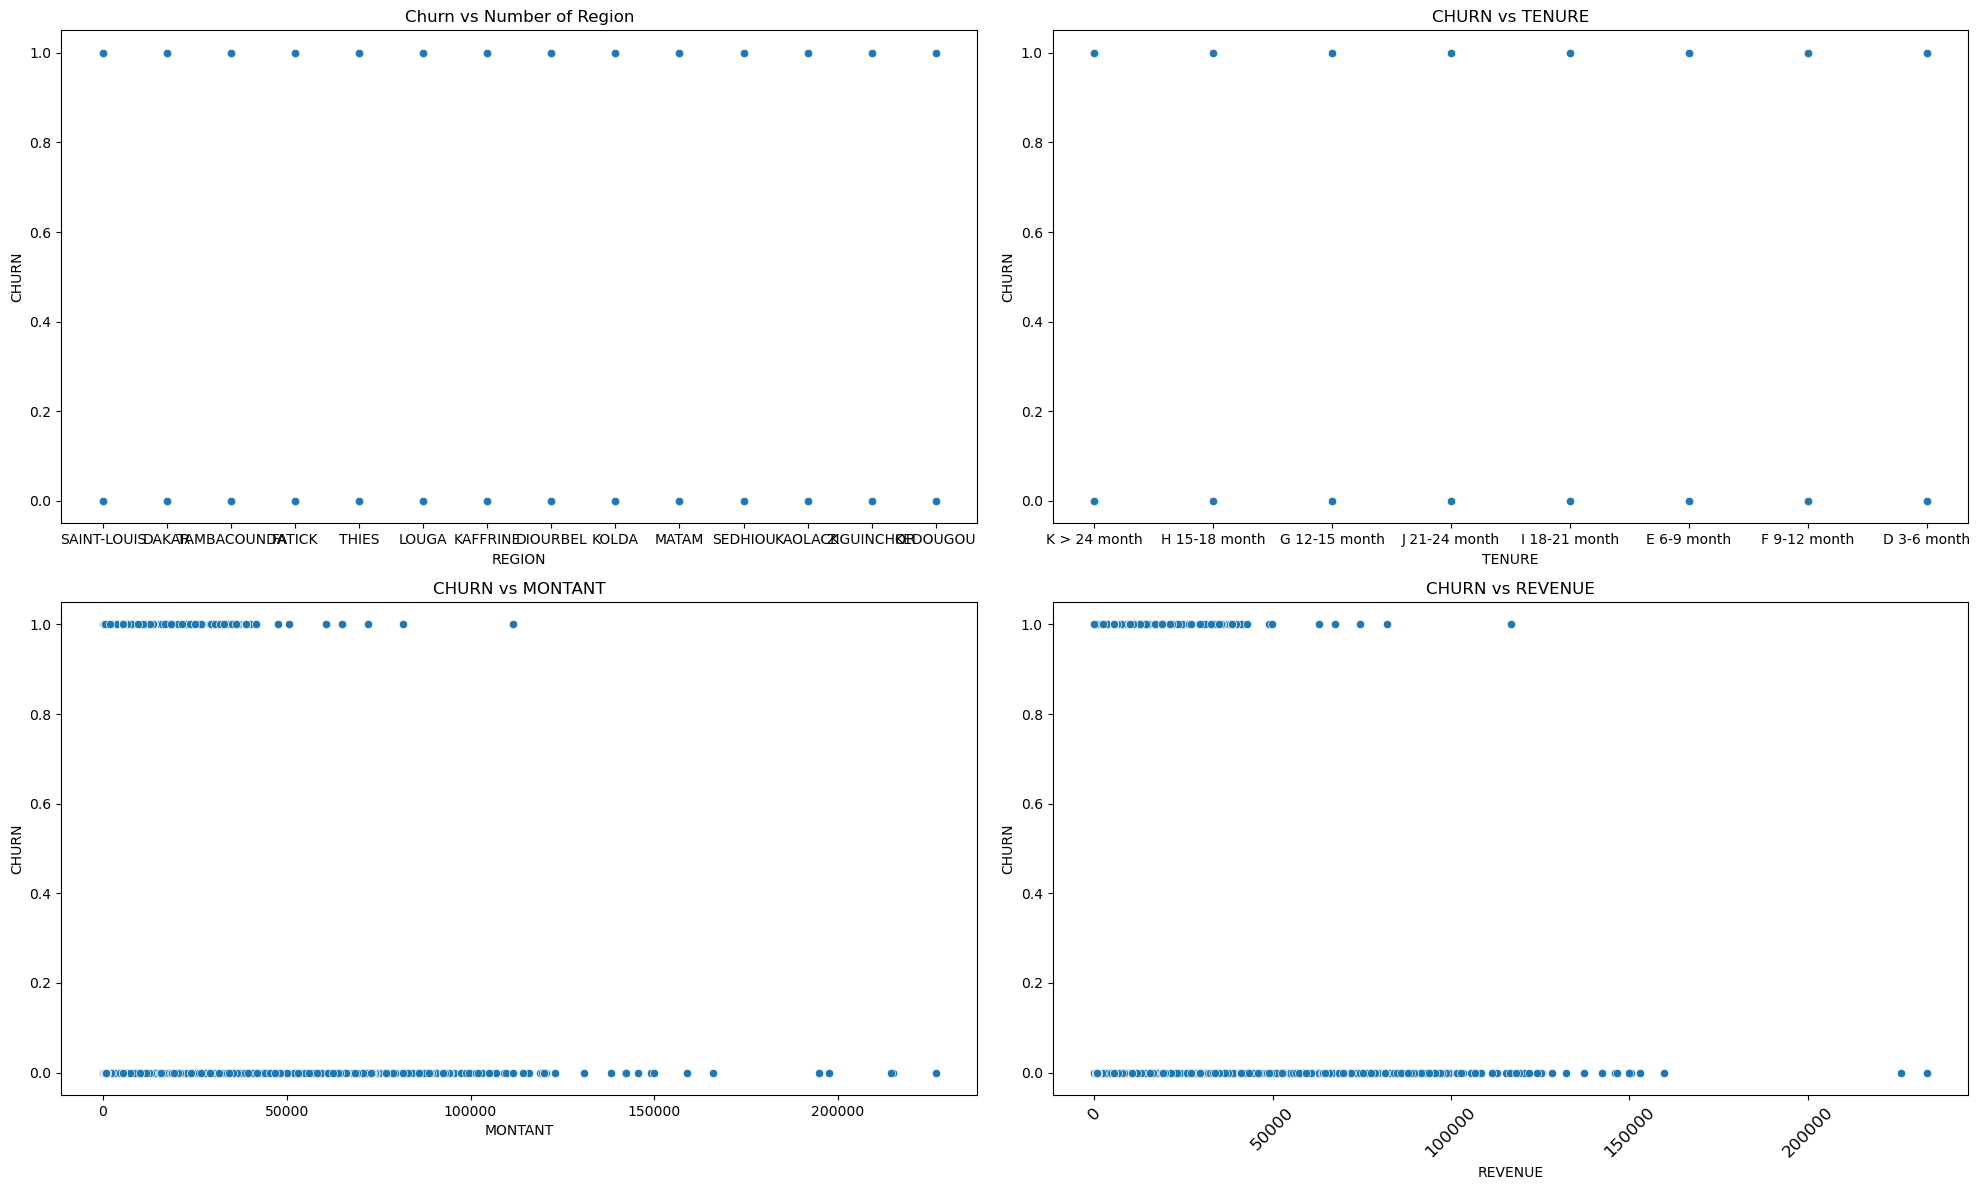

In [14]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.scatterplot(data= train, x='REGION', y= 'CHURN')
plt.title('Churn vs Number of Region')

plt.subplot(2,2,2)
sns.scatterplot(data= train, x='TENURE', y= 'CHURN')
plt.title('CHURN vs TENURE')

plt.subplot(2,2,3)
sns.scatterplot(data= train, x='MONTANT', y= 'CHURN')
plt.title('CHURN vs MONTANT')

plt.subplot(2,2,4)
sns.scatterplot(data= train, x='REVENUE', y= 'CHURN')
plt.title('CHURN vs REVENUE')
plt.xticks(rotation=45, fontsize=12)


plt.tight_layout()
plt.show()

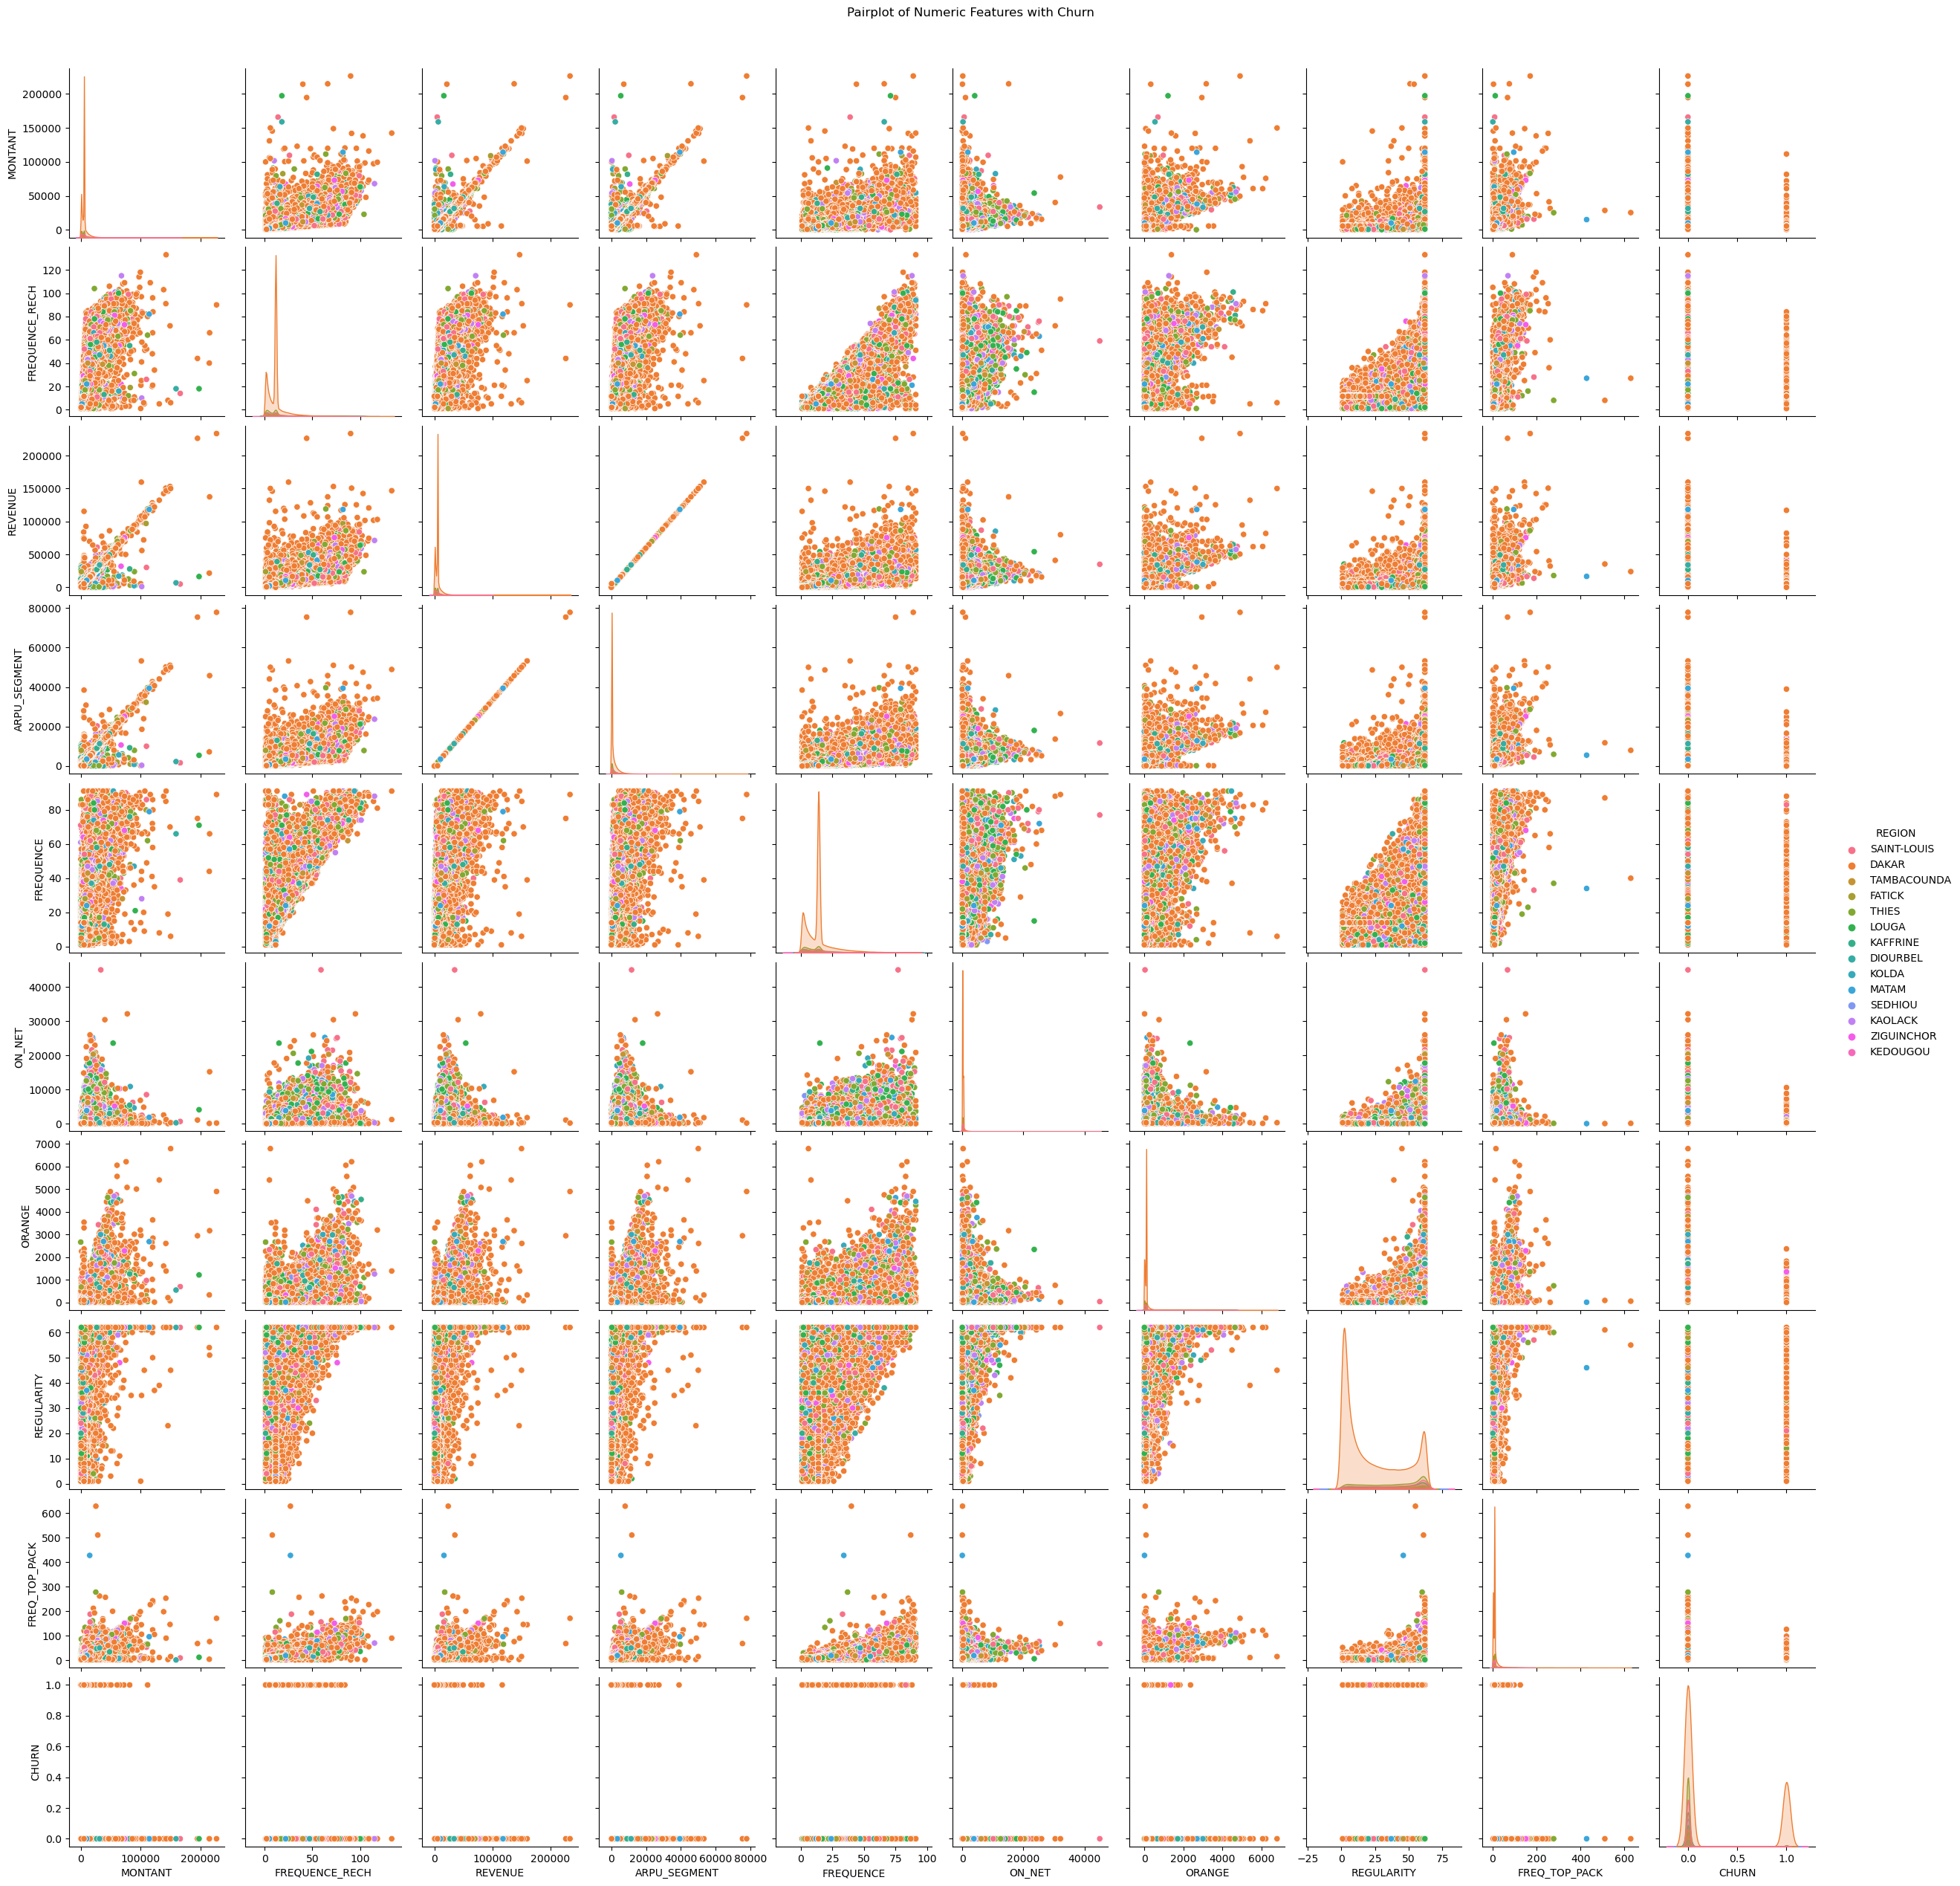

In [15]:
# Create the pairplot
sns.pairplot(train, hue='REGION', markers='o', diag_kind='kde')

# Set the title for the pairplot
plt.suptitle('Pairplot of Numeric Features with Churn', y=1.02)

# Display the plot
plt.show()

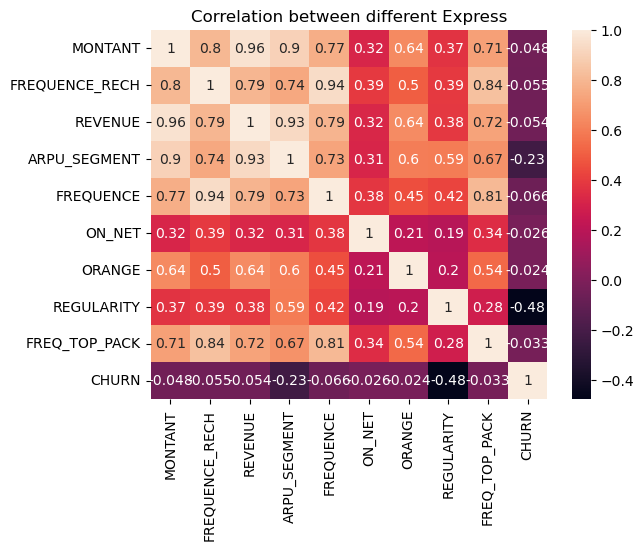

In [16]:
sns.heatmap(train.corr(), annot=True)

plt.title('Correlation between different Express', fontsize=12)

plt.show()